## Bank Term Deposit Acceptance forecasting

Obiettivo di questo assignment è la valutazione delle competenze tecniche del candidato e la sua modalità di approccio ad un problema di Data Science. Nello specifico è richiesto di sviluppare un modello predittivo in grado di indicare se un cliente intercettato da una campagna di marketing da parte di una banca decide di sottoscrivere o meno un deposito bancario a termine (bank term deposit).

#### Dataset: ####

All'interno della cartella **data**  viene fornito il file **bank-dataset.csv** che contiene le campagne marketing telefoniche effettuate da una banca per proporre l'acquisto del prodotto bancario.
I dettagli del dataset sono forniti all'interno del file: **bank-names.txt**.
La variabile target che indica se il cliente accetta o meno la sottoscrizione del deposito bancario è contenuta nel medesimo file con field name "y".

#### Assignement: ####

Richiesta di questo assignment è la costruzione di un modello predittivo con performance soddisfacenti per il candidato dando evidenza di tutti gli step tipici che dovrebbero essere affrontati in un progetto di Data Science: dalla pulizia e preparazione del dato fino al testing delle performance del modello costruito.

Il notebook svolto dovrà essere opportunamente commentato e dovrà essere consegnato tramite condivisione di un repository github personale accessibile che ne permetta la riproduzione.

# Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## Load dataset

In [28]:
df = pd.read_csv("data/bank-dataset.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no


## Initial Data Analysis

In [29]:
df['y'].replace(['yes','no'],[1,0],inplace=True)

In [30]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [31]:
#Data cleaning
df.isna().sum()
df = df.dropna() #removing nan values
# I removed nan values since there were few compared to all the data. However, it was also possible to replace them with the mean value 

#field correction: marital is a categorical value: "married","divorced","single"
df["marital"].mask(df["marital"]=="divrcd", "divorced", inplace=True)
df["marital"].mask(df["marital"]=="S", "single", inplace=True)
df["marital"].mask(df["marital"]=="Single", "single", inplace=True)
df["marital"].mask(df["marital"]=="Singl", "single", inplace=True)

In [32]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,41.302322,1342.136987,15.863968,244.703687,2.790548,38.153176,0.543989,0.073700
std,12.250112,2992.558988,8.430994,239.946794,3.122846,97.115860,2.264378,0.261285
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,67.000000,8.000000,101.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,436.000000,16.000000,174.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1399.000000,21.000000,303.000000,3.000000,-1.000000,0.000000,0.000000
max,150.000000,102127.000000,99.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


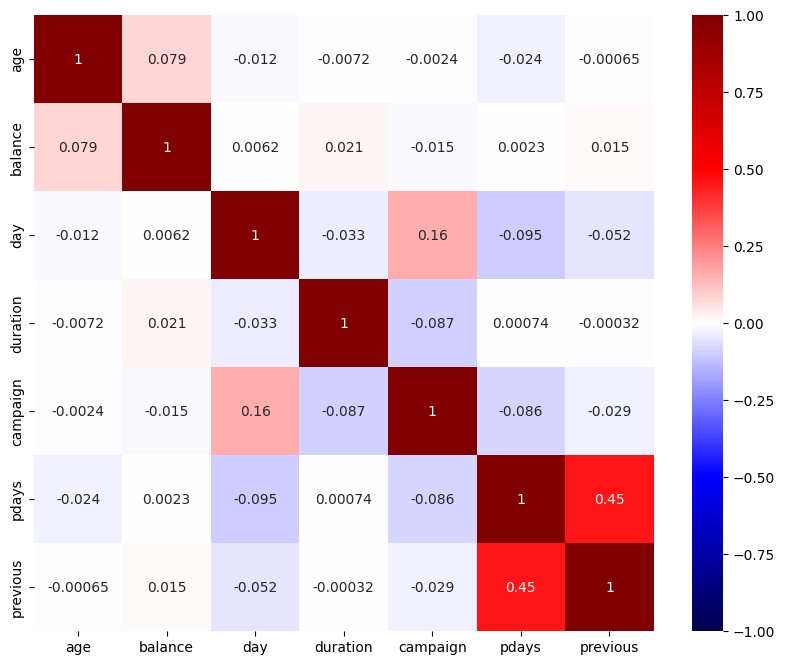

In [33]:
#Pearson Correlation
corr_mat = df[cols_num].corr()


plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_mat, annot=True, vmin=-1, vmax=1, cmap='seismic')

#correlation not very high, so pca may not be effective 

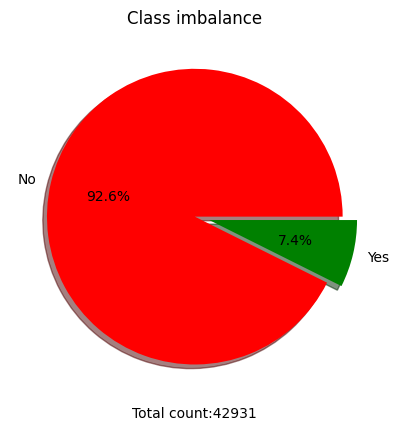

In [34]:
##Class imbalance
plt.plot()
labels = 'No', 'Yes'
plt.pie(df['y'].value_counts(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,labels=labels, colors=("r","g"))
plt.title('Class imbalance')
plt.xlabel(f"Total count:{len(df)}")
plt.show()

#We have imbalance data

### Histograms and box plot

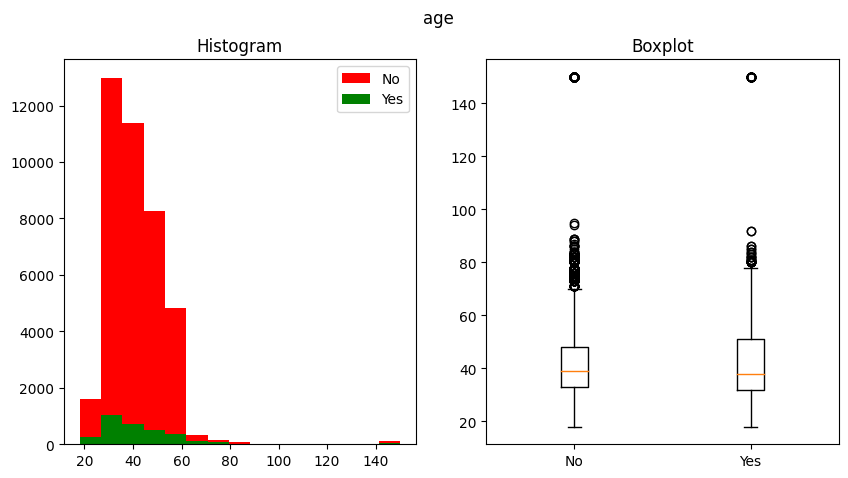

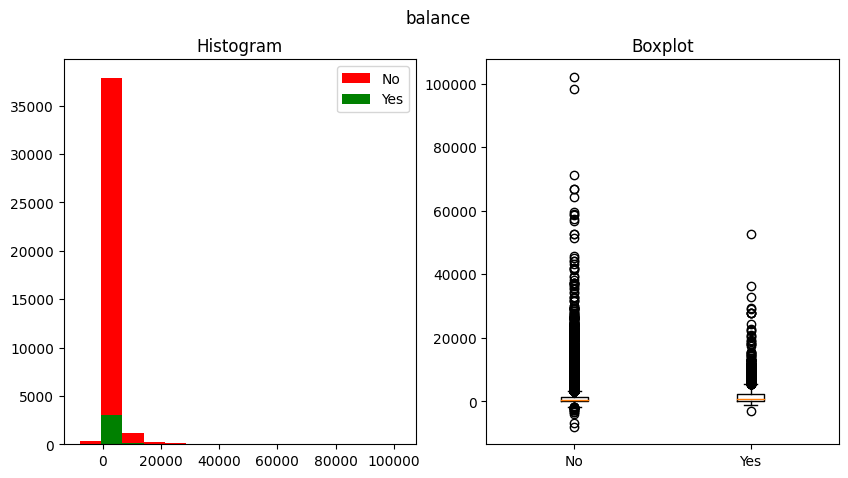

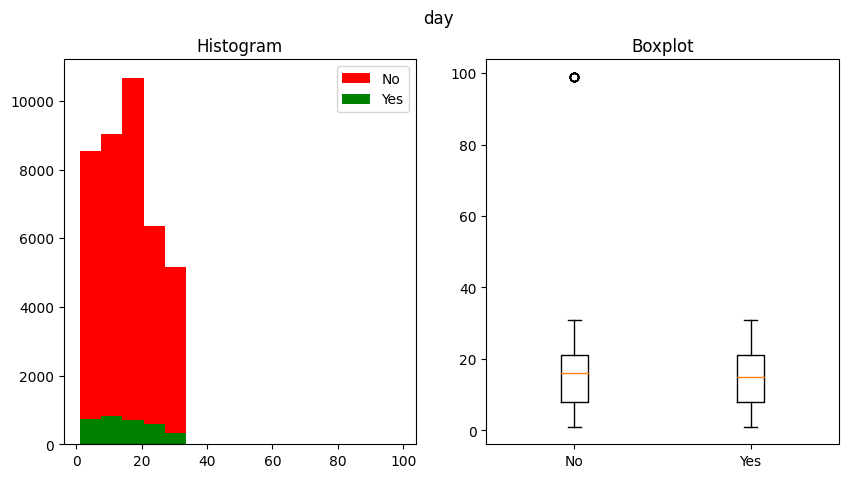

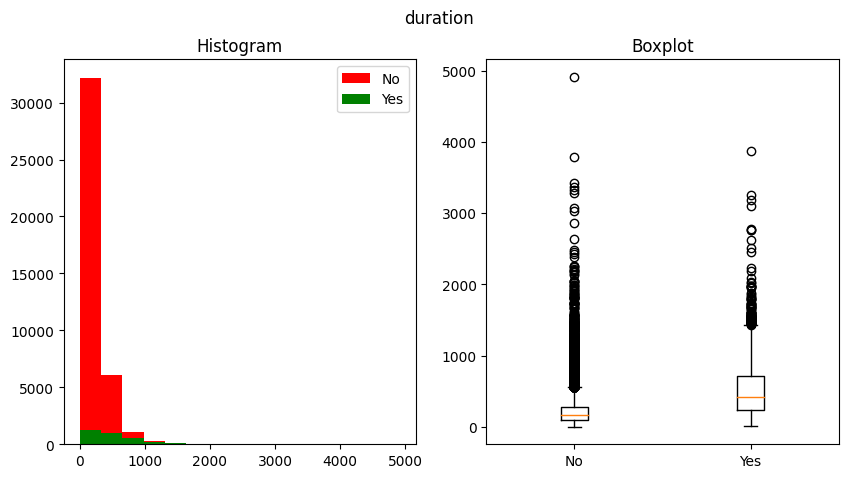

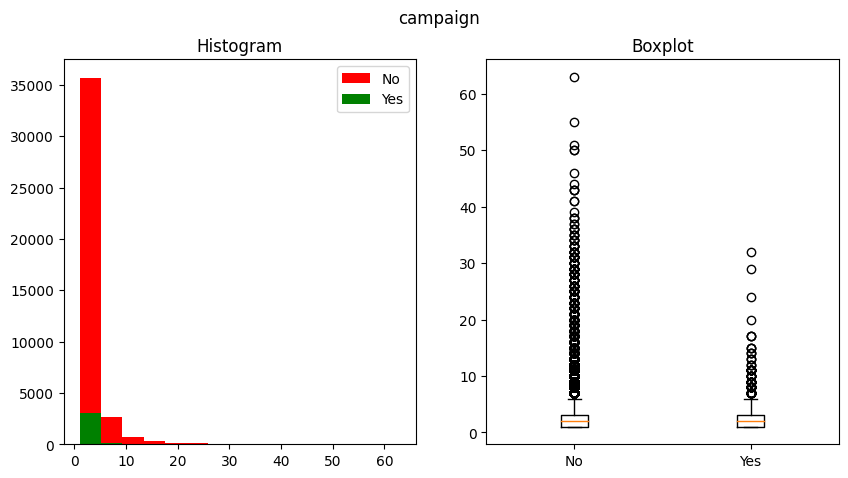

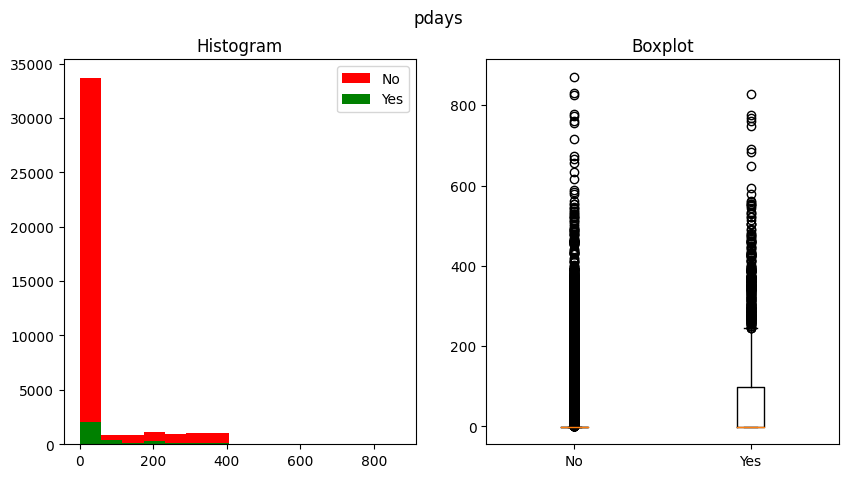

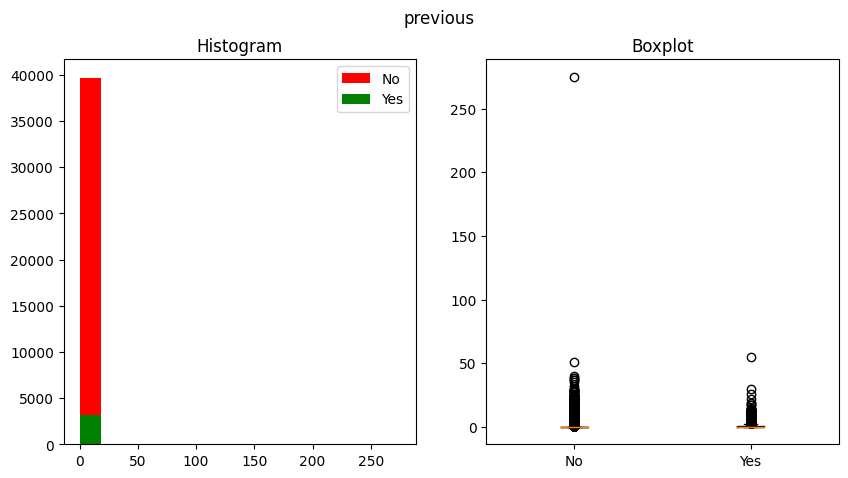

In [35]:
for c in cols_num:
    f, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.suptitle(c)
    min_value = min(df[c])
    max_value = max(df[c])
    axs[0].hist(df[df["y"]==0][c], color="r", bins=15, range=(min_value, max_value))
    axs[0].hist(df[df["y"]==1][c], color="g", bins=15, range=(min_value, max_value))
    axs[0].legend(["No", "Yes"])
    axs[0].set_title('Histogram')
    axs[1].boxplot([df[df["y"]==0][c], df[df["y"]==1][c]])
    axs[1].set_xticks([1,2],['No', 'Yes'] )
    axs[1].set_title('Boxplot')
    plt.show()

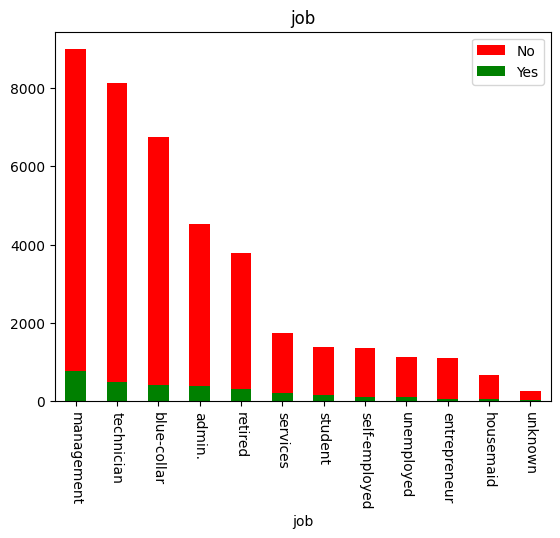

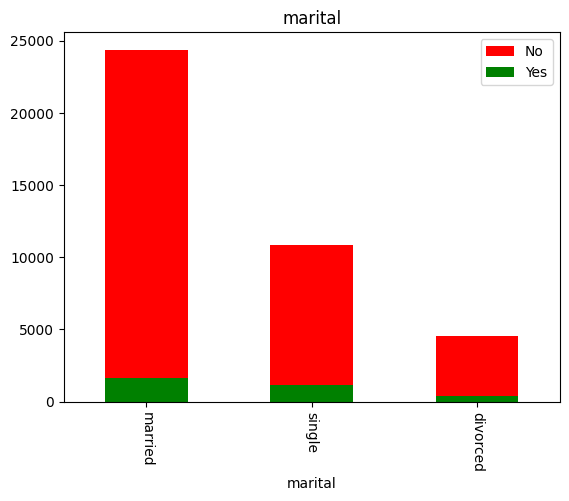

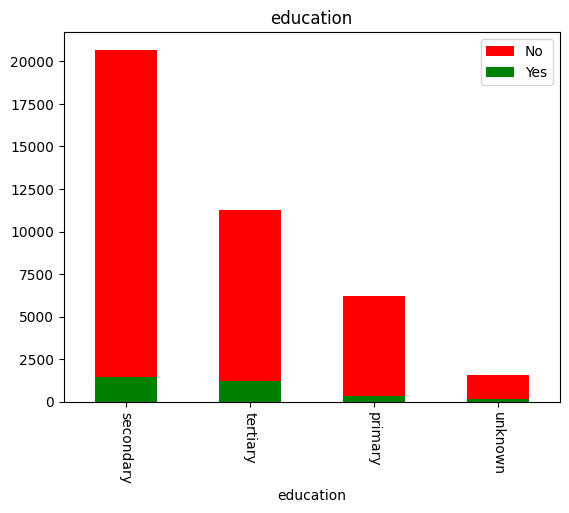

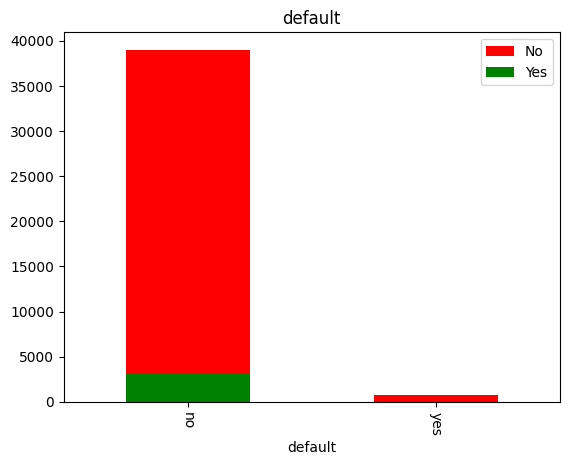

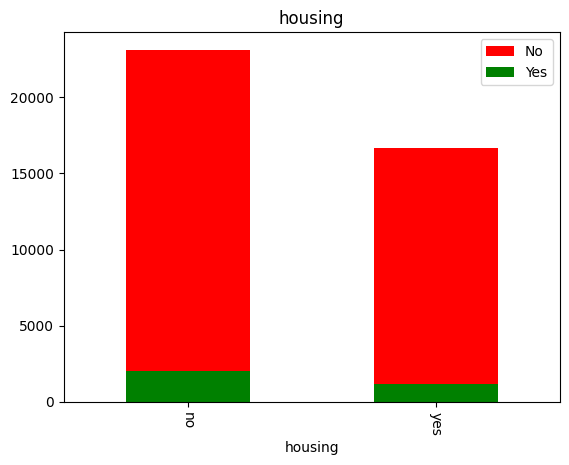

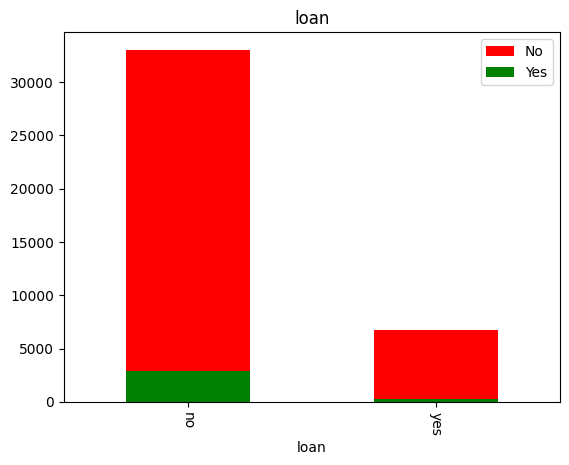

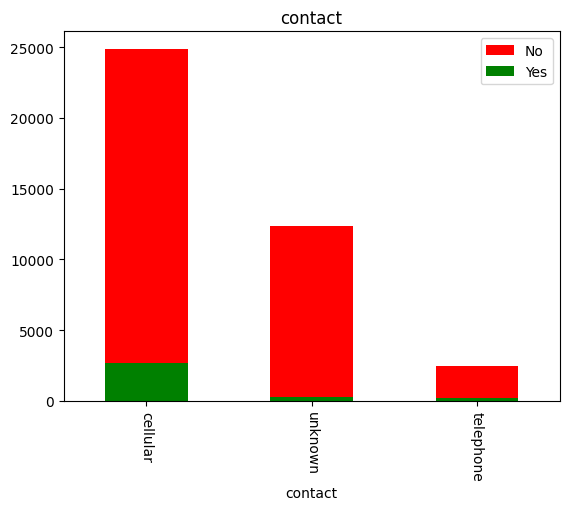

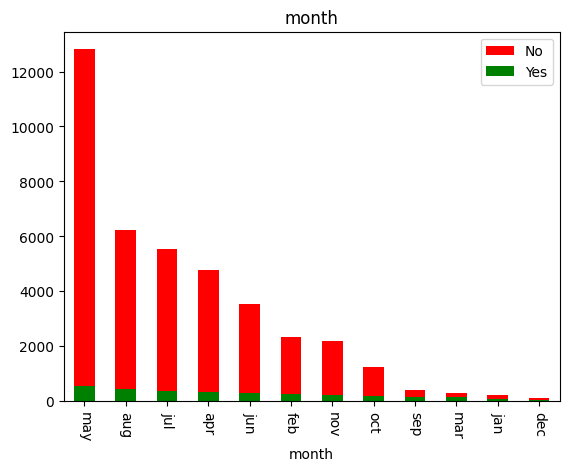

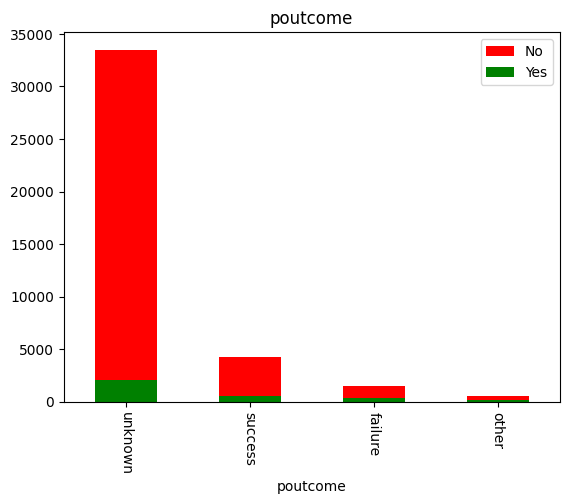

In [36]:
for c in cols_cat:
    plt.figure()
    b = df[c].unique()
    b = np.append(b,"")
    df[df["y"]==0][c].value_counts().plot(kind='bar', color='r')
    df[df["y"]==1][c].value_counts().plot(kind='bar', color='g')
    plt.xticks(rotation=-90)
    plt.title(c)
    plt.legend(['No', 'Yes'])
    plt.show()

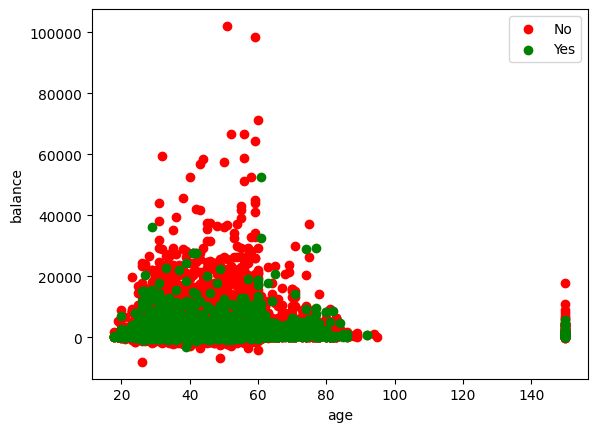

In [37]:
plt.scatter(df[df["y"]==0]["age"],df[df["y"]==0]["balance"],color="r")
plt.scatter(df[df["y"]==1]["age"],df[df["y"]==1]["balance"],color="g")
plt.xlabel("age")
plt.ylabel("balance")
plt.legend(['No', 'Yes'])

### Outliers

In [11]:
#In this case I detected outliers by using boxplot and histograms
#It was also possible to use different algorithms that can be used to detect and clean outliers
df = df[df["age"]<110]  #age always <110
df = df[df["day"]<32]   #days always <32
df = df[df["previous"]<60]  #outliers seen in box plot



### One Hot - Label encoding

In [12]:
#df = pd.get_dummies(df, columns=cols_cat)  #one hot encoding
le = LabelEncoder()
for c in cols_cat:
    df[c] = le.fit_transform(df[c])
#encoding the categorical values in numerical values (classes)

### Preprocessing

In [13]:
scaler = StandardScaler()
df[cols_num] = scaler.fit_transform(df[cols_num])

#z-score normalization for numerical features

In [14]:
df_y = df['y']
rf_cols = df.columns
rf_cols = rf_cols.drop('y')
df_x = df[rf_cols]

## Models

In [15]:
import sklearn.metrics
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [16]:
class Results:
    def __init__(self, name):
        self.name = name
        self.gr = np.array([])
        self.pred = np.array([])
        self.model_parameter = ""
    def concatenate(self, pred, gr):
        self.gr = np.hstack((self.gr,gr))
        self.pred = np.hstack((self.pred, pred))
        return sklearn.metrics.accuracy_score(self.gr, self.pred)
    def confusion_matrix(self):
        return sklearn.metrics.confusion_matrix(self.gr, self.pred)

In [17]:
#parameters grid for grid search for the different models

param_grid_rfc = {
    'max_depth': [1, 2, 4, 8, 16, None],
    'max_features': ["sqrt", "log2" ],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [ 10, 50, 100, 200, 400],
    'n_jobs': [-1]
}
param_grid_svm = {
    'C' : [0.1, 1,5,10],
    'coef0' : [0.01,0.1, 1, 10],
    'gamma' : ('auto','scale')  
}
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12] 
}

param_grid_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
param_grid_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
#Parameters selection 
results = dict()
cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

svc = SVC()
grid_search = RandomizedSearchCV(estimator = svc, param_distributions = param_grid_svm, cv = cv.split(df_x,df_y), n_jobs = -1, scoring='f1_macro')
results["SVC"] = grid_search.fit(df_x, df_y)


rfc = RandomForestClassifier()
grid_search = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid_rfc, cv = cv.split(df_x,df_y), n_jobs = -1, scoring='f1_macro')
results["RFC"] = grid_search.fit(df_x, df_y)

dt = DecisionTreeClassifier()
grid_search = RandomizedSearchCV(estimator = dt, param_distributions = param_grid_dt, cv = cv.split(df_x,df_y), n_jobs = -1, scoring='f1_macro')
results["DT"] = grid_search.fit(df_x, df_y)

xgb = XGBClassifier()
grid_search = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid_xgb, cv = cv.split(df_x,df_y), n_jobs = -1, scoring='f1_macro')
results["XGB"] = grid_search.fit(df_x, df_y)

mlp = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid_mlp, cv = cv.split(df_x,df_y), n_jobs = -1, scoring='f1_macro')
results["MLP"] = grid_search.fit(df_x, df_y)

In [19]:
rfc = results["RFC"].best_estimator_
svc = results["SVC"].best_estimator_
dt = results["DT"].best_estimator_
xgb = results["XGB"].best_estimator_
mlp = results["MLP"].best_estimator_
lr = LogisticRegression()
pca = PCA(n_components=10)
rfc_pca = Pipeline([("PCA", pca), ("RFC", rfc)])

In [20]:
class Results:
    def __init__(self, name):
        self.name = name
        self.gr = np.array([])
        self.pred = np.array([])
    def concatenate(self, pred, gr):
        self.gr = np.hstack((self.gr,gr))
        self.pred = np.hstack((self.pred, pred))
    def accuracy(self):
        return sklearn.metrics.accuracy_score(self.gr, self.pred)
    def confusion_matrix(self):
        return sklearn.metrics.confusion_matrix(self.gr, self.pred)

In [21]:
cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)
results = dict()
results["LR"]=Results("LR")
results["RFC"]=Results("RFC")
results["RFC+PCA"]=Results("RFC+PCA")
results["SVC"]=Results("SVC")
results["DT"]=Results("DT")
results["MLP"]=Results("MLP")
results["XGB"]=Results("XGB")

models = [("LR",lr), ("RFC",rfc), ("RFC+PCA",rfc_pca), ("SVC",svc), ("DT",dt), ("MLP", mlp), ("XGB", xgb)]
for train_index,test_index in cv.split(df_x,df_y):
        X_train,X_test = df_x.iloc[train_index],df_x.iloc[test_index]
        y_train,y_test = df_y.iloc[train_index],df_y.iloc[test_index]

        for mod_name, mod in models:
                mod.fit(X_train, y_train)
                Y_out_test = mod.predict(X_test)
                results[mod_name].concatenate(Y_out_test, y_test)
        

/home/andrea/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
for r in results:
    print(r)
    print(sklearn.metrics.classification_report(results[r].gr, results[r].pred))
    print()

LR
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     39636
         1.0       0.49      0.12      0.20      3124

    accuracy                           0.93     42760
   macro avg       0.71      0.56      0.58     42760
weighted avg       0.90      0.93      0.91     42760


RFC
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     39636
         1.0       0.62      0.22      0.33      3124

    accuracy                           0.93     42760
   macro avg       0.78      0.61      0.65     42760
weighted avg       0.92      0.93      0.92     42760


RFC+PCA
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     39636
         1.0       0.54      0.13      0.21      3124

    accuracy                           0.93     42760
   macro avg       0.74      0.56      0.59     42760
weighted avg       0.91      0.93      0.91     42760


S

In [23]:
# the class 'yes' is more important since it is a potential client 
# so we have to improve the results on the 1 class using RandomOverSampling

from imblearn.over_sampling import RandomOverSampler


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)
results2 = dict()
results2["LR"]=Results("LR")
results2["RFC"]=Results("RFC")
results2["RFC+PCA"]=Results("RFC+PCA")
results2["SVC"]=Results("SVC")
results2["DT"]=Results("DT")
results2["MLP"]=Results("MLP")
results2["XGB"]=Results("XGB")


models = [("LR",lr), ("RFC",rfc), ("SVC",svc), ("RFC+PCA",rfc_pca), ("DT",dt), ("MLP", mlp), ("XGB", xgb)]
for train_index,test_index in cv.split(df_x,df_y):
        X_train,X_test = df_x.iloc[train_index],df_x.iloc[test_index]
        y_train,y_test = df_y.iloc[train_index],df_y.iloc[test_index]
        sampler = RandomOverSampler(random_state=42)
        X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)
        for mod_name, mod in models:
                mod.fit(X_sampled, y_sampled)
                Y_out_test = mod.predict(X_test)
                results2[mod_name].concatenate(Y_out_test, y_test)

In [24]:
for r in results2:
    print(r)
    print(sklearn.metrics.classification_report(results2[r].gr, results2[r].pred))
    print()

LR
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     39636
         1.0       0.25      0.80      0.38      3124

    accuracy                           0.81     42760
   macro avg       0.61      0.80      0.63     42760
weighted avg       0.93      0.81      0.85     42760


RFC
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     39636
         1.0       0.52      0.35      0.42      3124

    accuracy                           0.93     42760
   macro avg       0.74      0.66      0.69     42760
weighted avg       0.92      0.93      0.92     42760


RFC+PCA
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     39636
         1.0       0.50      0.28      0.36      3124

    accuracy                           0.93     42760
   macro avg       0.72      0.63      0.66     42760
weighted avg       0.91      0.93      0.92     42760


S

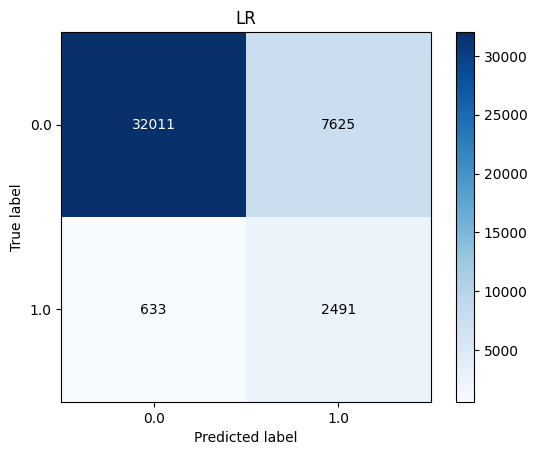

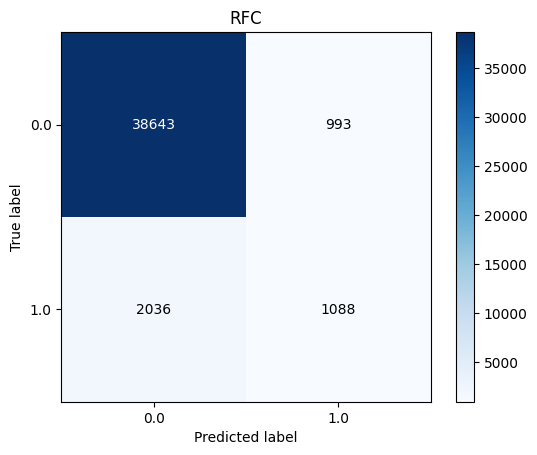

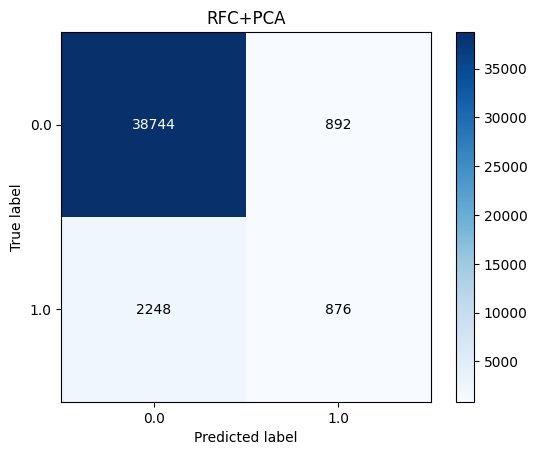

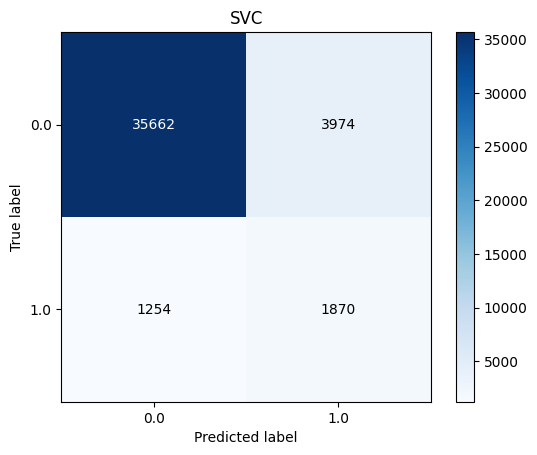

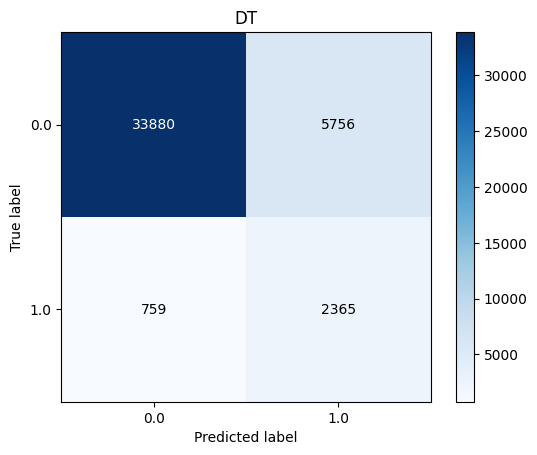

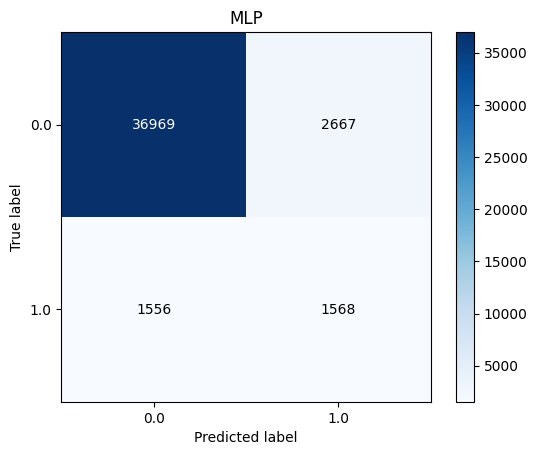

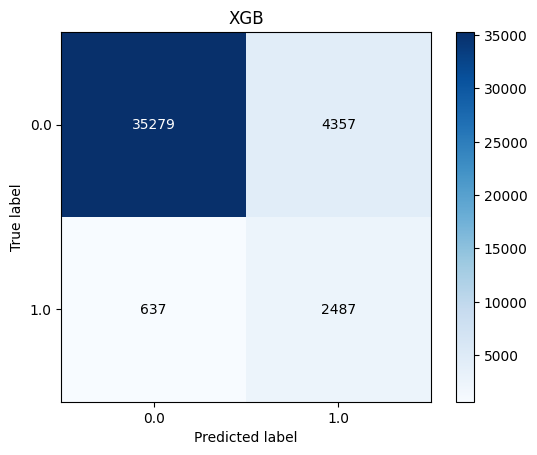

In [25]:
import scikitplot as skplt
for r in results2:
    skplt.metrics.plot_confusion_matrix(results2[r].gr, results2[r].pred, normalize=False, title = r)

In all the models used, XGBoost Classifier had higher performance. 